User identification scenario One: ranking situationFirst, calculate the required data

In [1]:
import pandas as pd
df = pd.read_csv("G:\\data_all\\mathoverflow_a2q\\filtered_results.csv")
ego1 = list(df['ego'])
print(len(ego1))

54


In [55]:
import pandas as pd
import numpy as np
from math import log
import csv
from matplotlib import pyplot as plt
from matplotlib.pyplot import *
ego_unique=ego1
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

df1 = pd.read_excel('G:\\data_all\\mathoverflow_a2q\\M\\M_data_1.xlsx')
df2 = pd.read_excel('G:\\data_all\\mathoverflow_a2q\\M\\M_data_2.xlsx')
df3 = pd.read_excel('G:\\data_all\\mathoverflow_a2q\\M\\M_data_3.xlsx')
df4 = pd.read_excel('G:\\data_all\\mathoverflow_a2q\\M\\M_data_4.xlsx')
df5 = pd.read_excel('G:\\data_all\\mathoverflow_a2q\\M\\M_data_5.xlsx')
df6 = pd.read_excel('G:\\data_all\\mathoverflow_a2q\\M\\M_data_6.xlsx')

w_list_list1 = []
grouped1 = df1.groupby(["ego"])
def get_w_list1(user1):

    group1 = grouped1.get_group(user1)

    w = group1['weight']
    user_w = []
    fl = []
    for x in w:
        user_w.append(x)
        user_w.sort(reverse=True)
        #eturn user_w
    total = sum(user_w)
    if(total!=0):
        for x in user_w:
            x = x / total
            fl.append(x)
    w_list_list1.append(fl)
    
w_list_list2 = []
grouped2 = df2.groupby(["ego"])
def get_w_list2(user1):

    group2 = grouped2.get_group(user1)

    w = group2['weight']
    user_w = []
    f2 = []
    for x in w:
        user_w.append(x)
        user_w.sort(reverse=True)
        #eturn user_w
    total = sum(user_w)
    if(total!=0):
        for x in user_w:
            x = x / total
            f2.append(x)
    w_list_list2.append(f2)
    
w_list_list3 = []
grouped3 = df3.groupby(["ego"])
def get_w_list3(user1):

    group3 = grouped3.get_group(user1)

    w = group3['weight']
    user_w = []
    f3 = []
    for x in w:
        user_w.append(x)
        user_w.sort(reverse=True)
        #eturn user_w
    total = sum(user_w)
    if(total!=0):
        for x in user_w:
            x = x / total
            f3.append(x)
    w_list_list3.append(f3)
    
w_list_list4 = []
grouped4 = df4.groupby(["ego"])
def get_w_list4(user1):

    group4 = grouped4.get_group(user1)

    w = group4['weight']
    user_w = []
    f4 = []
    for x in w:
        user_w.append(x)
        user_w.sort(reverse=True)
        #eturn user_w
    total = sum(user_w)
    if(total!=0):
        for x in user_w:
            x = x / total
            f4.append(x)
    w_list_list4.append(f4)
    
w_list_list5 = []
grouped5 = df5.groupby(["ego"])
def get_w_list5(user1):

    group5 = grouped5.get_group(user1)

    w = group5['weight']
    user_w = []
    f5 = []
    for x in w:
        user_w.append(x)
        user_w.sort(reverse=True)
        #eturn user_w
    total = sum(user_w)
    if(total!=0):
        for x in user_w:
            x = x / total
            f5.append(x)
    w_list_list5.append(f5)
    
w_list_list6 = []
grouped6 = df6.groupby(["ego"])
def get_w_list6(user1):

    group6 = grouped6.get_group(user1)

    w = group6['weight']
    user_w = []
    f6 = []
    for x in w:
        user_w.append(x)
        user_w.sort(reverse=True)
        #eturn user_w
    total = sum(user_w)
    if(total!=0):
        for x in user_w:
            x = x / total
            f6.append(x)
    w_list_list6.append(f6)
    
for x in ego_unique:
    get_w_list1(x)
for x in ego_unique:
    get_w_list2(x)
for x in ego_unique:
    get_w_list3(x)
for x in ego_unique:
    get_w_list4(x)
for x in ego_unique:
    get_w_list5(x)
for x in ego_unique:
    get_w_list6(x)

# the final d_list to show
test_d = []


class JSD:

    def H(self, p):
        return -sum(_p * log(_p if _p > 0 else 1) for _p in p)

    def JSD_d(self, p, q):
        lp = len(p)
        lq = len(q)
        d_value = lp - lq
        if(d_value > 0):
            i = 1
            for i in range(d_value):
                q.append(0)
        else:
            for i in range(-d_value):
                p.append(0)

        M = [0.5 * (_p + _q) for _p, _q in zip(p, q)]
        t = (self.H(M) - (self.H(p) + self.H(q)) / 2)
        #return round(t,3)
        return t

In [56]:
jsd = JSD()
len_ego = len(ego_unique)
test_d = []

list_names = [w_list_list1, w_list_list2, w_list_list3, w_list_list4, w_list_list5, w_list_list6]
#list_names = [w_list_list1, w_list_list2, w_list_list3]

for t in range(len(list_names)):
    for z in range(len(list_names)):
        for i in range(0, len_ego):
            for j in range(0, len_ego):
                if t != z:
                    w_list_1 = list_names[t]
                    w_list_2 = list_names[z]
                    ego_1 = ego_unique[i]
                    ego_2 = ego_unique[j]
                    d = jsd.JSD_d(w_list_1[i], w_list_2[j])
                    test_d.append({'ego_1': ego_1, 'ego_2': ego_2, 'JSD_value': d})

dref = pd.DataFrame(test_d)
dref.to_csv("G:\\data_all\\mathoverflow_a2q\\M\\nearest_known_labels.csv")

In [57]:
import pandas as pd

df = pd.read_csv("G:\\data_all\\mathoverflow_a2q\\M\\nearest_known_labels.csv")

# For each pair (ego1, ego2), we need to create a new column for each JSD_value
# Generate a sequence number using cumcount and a new column name for each JSD_value of each pair (ego1, ego2)
df['count'] = df.groupby(['ego_1', 'ego_2']).cumcount() + 1
df_pivot = df.pivot(index=['ego_1', 'ego_2'], columns='count', values='JSD_value')

# Rename columns to represent their contents more clearly
df_pivot.columns = [f'JSD_value_{i}' for i in df_pivot.columns]

df_pivot.reset_index(inplace=True)

df_pivot.to_csv('G:\\data_all\\mathoverflow_a2q\\M\\nearest_known_labels_1.csv', index=False)

Ranking-based User Identification

In [181]:
import pandas as pd

# Read a table with known user tags, unknown user tags, and social fingerprint distances
#df = pd.read_excel('F:\\shiyan2\\0923\\email\\R\\identification\\nearest_data.xlsx')
df = pd.read_excel('G:\\data_all\\mathoverflow_a2q\\T\\nearest_data.xlsx')
# Define a function to determine whether the recognition was successful
def is_recognized(nearest_known_labels, true_label, n=1):
    # Capture the last n known user tags
    nearest_known_labels = nearest_known_labels[:n]
    # Determine if the correct known user tag exists
    return true_label in nearest_known_labels

# Initialize the variable to record the total number of users and the number of successfully identified users
total_users = 0
recognized_users = 0

# Store recognition accuracy for different n values
results = []

n_values = list(range(1, 55))

grouped = df.groupby('未知用户预设标签')

for n in n_values:
    total_users = 0
    recognized_users = 0

    for label, group in grouped:
        true_label = label  # Unknown user default label
        known_labels = group['已知用户标签'].tolist()  # List of known user tags
        distances = group['社交指纹距离'].tolist()  # Social signature distance list

        # Find the n known user tags with the smallest distance
        nearest_known_labels = [known_labels[i] for i in sorted(range(len(distances)), key=lambda i: distances[i])[:n]]

        # Check whether the identification is successful
        if is_recognized(nearest_known_labels, true_label, n):
            recognized_users += 1

        total_users += 1

    # Computational recognition accuracy
    accuracy = round(recognized_users / total_users,3)

    results.append({'n': n, '识别准确率': accuracy})

result_df = pd.DataFrame(results)

result_df.to_excel('G:\\data_all\\mathoverflow_a2q\\MU\\recognition_results.xlsx', index=False)

Improved version, converts nearest_known_labels to the final result directly.

In [58]:
import pandas as pd

df = pd.read_csv('G:\\data_all\\mathoverflow_a2q\\N\\nearest_known_labels_1.csv')

def is_recognized(nearest_known_labels, true_label, n=1):
    nearest_known_labels = nearest_known_labels[:n]
    return true_label in nearest_known_labels


total_users = 0
recognized_users = 0

n_values = list(range(1, 9))

distance_columns = [col for col in df.columns if col.startswith('JSD_value')]

result_df = pd.DataFrame({'n': n_values})

for distance_col in distance_columns:
    results = []
    grouped = df.groupby('ego_2')

    for n in n_values:
        total_users = 0
        recognized_users = 0

        for label, group in grouped:
            true_label = label
            known_labels = group['ego_1'].tolist() 
            distances = group[distance_col].tolist()  

            nearest_known_labels = [known_labels[i] for i in sorted(range(len(distances)), key=lambda i: distances[i])[:n]]

            if is_recognized(nearest_known_labels, true_label, n):
                recognized_users += 1

            total_users += 1

        accuracy = round(recognized_users / total_users, 3)
        results.append(accuracy)

    result_df[distance_col] = results

result_df.to_excel('G:\\data_all\\mathoverflow_a2q\\N\\recognition_results.xlsx', index=False)

Threshold based user identification

In [59]:
import numpy as np
import pandas as pd

data = pd.read_excel('G:\\data_all\\mathoverflow_a2q\\all_data.xlsx')
true_labels = data.iloc[:, -1]  # The last column is the label

# Gets the names of all feature columns
feature_columns = data.loc[:, 'N':'N']  

# Create a list of thresholds between 0 and 1 with a step of 0.01
thresholds = np.arange(0, 1.01, 0.01)
#thresholds = np.arange(0, 0.04, 0.0001)
#thresholds = np.arange(0, 0.01, 0.0001)
#thresholds = np.arange(0, 0.025, 0.0002)

#Create a dictionary to store thresholds and recognition success rates for each feature column
feature_success_rates = {}

# Repeat 1000 times
for i in range(1000):
    sampled_data = data.copy()  # Copy the original data for repeated sampling
    for column in feature_columns:
        # Randomly select the same number of negative samples as positive samples
        negative_samples = sampled_data[sampled_data.iloc[:, -1] == 0].sample(n=len(sampled_data[sampled_data.iloc[:, -1] == 1]), random_state=i)
        sampled_data = pd.concat([sampled_data[sampled_data.iloc[:, -1] == 1], negative_samples])

        success_rates = []
        for threshold in thresholds:
            predicted_labels = [0 if x > threshold else 1 for x in sampled_data[column]]
            correct_predictions = sum(1 for pred, true in zip(predicted_labels, sampled_data.iloc[:, -1]) if pred == true)
            success_rate = correct_predictions / len(sampled_data)
            success_rates.append(success_rate)
        feature_success_rates[f'{column}_sampled_{i}'] = success_rates

# Convert dictionary to DataFrame
result_df = pd.DataFrame(feature_success_rates)

# Add threshold column
result_df['阈值'] = thresholds

# Calculate the average of each row
row_means = result_df.iloc[:, :-1].mean(axis=1)
# Calculate the variance of each row
row_variances = result_df.iloc[:, :-1].var(axis=1)

result_df['平均值'] = row_means
result_df['方差'] = row_variances

result_df.to_excel('G:\\data_all\\mathoverflow_a2q\\threshold_success_rates\\N.xlsx', index=False)

Machine learning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

#df = pd.read_excel('G:\\data_all\\mathoverflow_c2a\\all_data.xlsx')
df = pd.read_excel('G:\\data_all\\mathoverflow_a2q\\all_data.xlsx')

num_iterations = 100

accuracy_scores = []
recall_scores = []
f1_scores = []

# Initializes the list of importance of stored features
feature_importances = []

# Cycle of random sampling and model training
for _ in range(num_iterations):
    # Randomly select the same number of negative samples as positive samples
    positive_samples = df[df['leibie'] == 1]
    negative_samples = df[df['leibie'] == 0].sample(n=len(positive_samples), replace=True)
    balanced_data = pd.concat([positive_samples, negative_samples])
    
    # Divide the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(
        balanced_data.loc[:, 'N':'A'], 
        balanced_data['leibie'], test_size=0.3, random_state=42
    )

    # Use the XGBoost model
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    xgb_model = XGBClassifier()
    grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    # Train the XGBoost model with the best parameters
    model = XGBClassifier(**best_params)
    model.fit(X_train, y_train)

    # Calculate accuracy, recall and F1 values
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    # Collect feature importance
    feature_importances.append(model.feature_importances_)

# Get the feature name
feature_names = balanced_data.loc[:, 'N':'A'].columns

# Average of feature importance
mean_feature_importances = np.mean(feature_importances, axis=0)

# Create a DataFrame of feature importance for sorting and visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_feature_importances
})

# In order of importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, len(importance_df) / 2))  
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

for bar in bars:
    plt.text(
        bar.get_width(),       
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width():.3f}',  
        va='center'  
    )

plt.xlabel('F-score (Importance)')
plt.title('Feature Importances')
plt.show()
# Calculate mean, variance, and standard deviation
mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)
std_dev_accuracy = np.std(accuracy_scores)

mean_recall = np.mean(recall_scores)
variance_recall = np.var(recall_scores)
std_dev_recall = np.std(recall_scores)

mean_f1 = np.mean(f1_scores)
variance_f1 = np.var(f1_scores)
std_dev_f1 = np.std(f1_scores)

# Output result
print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)
print("Standard Deviation of Accuracy:", std_dev_accuracy)

#print("Mean Recall:", mean_recall)
#print("Variance of Recall:", variance_recall)
#print("Standard Deviation of Recall:", std_dev_recall)

#print("Mean F1 Score:", mean_f1)
#print("Variance of F1 Score:", variance_f1)
#print("Standard Deviation of F1 Score:", std_dev_f1)

Time stability

The time stability data is calculated in the sorting case

In [ ]:
import pandas as pd

# Define a list of folder names
folders = ['N', 'R', 'O', 'K', 'M', 'T', 'MU', 'A']

# Define column names for each group
group_1 = [12, 21, 23, 32, 34, 43, 45, 54, 56, 65]  
group_2 = [13, 24, 31, 35, 42, 46, 53, 64]
group_3 = [14, 25, 36, 41, 52, 63]
group_4 = [15, 26, 51, 62]
group_5 = [16, 61]

# Separate each set of data and calculate the average of each row
groups = [group_1, group_2, group_3, group_4, group_5]
group_names = ['rankT1', 'rankT2', 'rankT3', 'rankT4', 'rankT5']

# Initializes a dictionary to store a list of data boxes for each group
group_dfs = {name: [] for name in group_names}

# Process files in each folder
for folder in folders:
    file_path = f'G:\\data_all\\mathoverflow_c2q\\{folder}\\recognition_results.xlsx'
    df = pd.read_excel(file_path)
    
    for group, name in zip(groups, group_names):
        # Check that the column name exists
        missing_columns = [col for col in group if col not in df.columns]
        if missing_columns:
            print(f"Columns {missing_columns} are not in the dataframe for group {name} in folder {folder}.")
            continue
        
        # Select the corresponding column
        df_group = df[group]
        
        # Calculate the average of each row and add to the last column
        df_group['mean'] = df_group.mean(axis=1)
        
        # Save to a new Excel file
        file_name = f'G:\\data_all\\mathoverflow_c2q\\{folder}\\{name}.xlsx'
        df_group.to_excel(file_name, index=False)
        
        # Adds the processed data box to the list of the corresponding group
        group_dfs[name].append(df_group)
    
# Concatenate data boxes for each group and save them
for name, dfs in group_dfs.items():
    if dfs:
        df_concat = pd.concat(dfs, axis=1)
        concat_file_path = f'G:\\data_all\\mathoverflow_c2q\\{name}_combined.xlsx'
        df_concat.to_excel(concat_file_path, index=False)
        print(f"{name}_combined 文件已成功保存。")

In [62]:
import numpy as np
import pandas as pd

data = pd.read_excel('G:\\data_all\\superuser_c2q\\all_data.xlsx', sheet_name="T1")
true_labels = data.iloc[:, -1]  # The last column is the label

feature_columns = data.loc[:, 'M':'M']  

#thresholds = np.arange(0, 1.01, 0.05)
thresholds = np.arange(0, 0.03, 0.0001)
#thresholds = np.arange(0, 0.01, 0.0001)
#thresholds = np.arange(0, 0.03, 0.0002)

feature_success_rates = {}

for i in range(1000):
    sampled_data = data.copy()  
    for column in feature_columns:
        negative_samples = sampled_data[sampled_data.iloc[:, -1] == 0].sample(n=len(sampled_data[sampled_data.iloc[:, -1] == 1]), random_state=i)
        sampled_data = pd.concat([sampled_data[sampled_data.iloc[:, -1] == 1], negative_samples])

        success_rates = []
        for threshold in thresholds:
            predicted_labels = [0 if x > threshold else 1 for x in sampled_data[column]]
            correct_predictions = sum(1 for pred, true in zip(predicted_labels, sampled_data.iloc[:, -1]) if pred == true)
            success_rate = correct_predictions / len(sampled_data)
            success_rates.append(success_rate)
        feature_success_rates[f'{column}_sampled_{i}'] = success_rates

result_df = pd.DataFrame(feature_success_rates)

result_df['阈值'] = thresholds

row_means = result_df.iloc[:, :-1].mean(axis=1)

row_variances = result_df.iloc[:, :-1].var(axis=1)

result_df['平均值'] = row_means
result_df['方差'] = row_variances

result_df.to_excel('G:\\data_all\\superuser_c2q\\M\\threshold_T1.xlsx', index=False)

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score
from xgboost import XGBClassifier
import shap

df = pd.read_excel('G:\\data_all\\superuser_c2q\\all_data.xlsx', sheet_name="T1")

num_iterations = 100

accuracy_scores = []
recall_scores = []
f1_scores = []

shap_values_list = []

for _ in range(num_iterations):
    positive_samples = df[df['leibie'] == 1]
    negative_samples = df[df['leibie'] == 0].sample(n=len(positive_samples), replace=True)
    balanced_data = pd.concat([positive_samples, negative_samples])

    X_train, X_test, y_train, y_test = train_test_split(
            balanced_data.loc[:, 'N':'A'], balanced_data.iloc[:, -1], test_size=0.3, random_state=42
    )

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    xgb_model = XGBClassifier()
    grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    # Train XGBoost model with the best parameters
    model = XGBClassifier(**best_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)
std_dev_accuracy = np.std(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)
print("Standard Deviation of Accuracy:", std_dev_accuracy)

Mean Accuracy: 0.6957407407407408
Variance of Accuracy: 0.005330967078189298
Standard Deviation of Accuracy: 0.07301347189518724


Feature importance

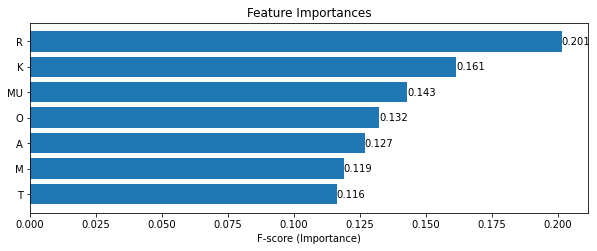

Mean Accuracy: 0.783021308980213
Variance of Accuracy: 0.0001787088004373923
Standard Deviation of Accuracy: 0.013368201092046466


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

#df = pd.read_excel('G:\\data_all\\mathoverflow_c2a\\all_data.xlsx')
df = pd.read_excel('G:\\data_all\\mathoverflow_c2q\\all_data.xlsx')

num_iterations = 100

accuracy_scores = []
recall_scores = []
f1_scores = []

feature_importances = []

for _ in range(num_iterations):
    positive_samples = df[df['leibie'] == 1]
    negative_samples = df[df['leibie'] == 0].sample(n=len(positive_samples), replace=True)
    balanced_data = pd.concat([positive_samples, negative_samples])
    #columns_to_select = ['N', 'R', 'O', 'K', 'M', 'T', 'MU', 'A'] 
    #Each time we remove the feature with the highest ranking importance, 
    #we record the accuracy offline, one by one, until all the features have been removed, and we get the sensitivity level
    columns_to_select = ['R', 'O', 'K', 'M', 'T', 'MU', 'A'] 
    
    X_train, X_test, y_train, y_test = train_test_split(
        balanced_data[columns_to_select], 
        balanced_data['leibie'], test_size=0.3, random_state=42
    )

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    xgb_model = XGBClassifier()
    grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    model = XGBClassifier(**best_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

    feature_importances.append(model.feature_importances_)

feature_names = columns_to_select

mean_feature_importances = np.mean(feature_importances, axis=0)

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, len(importance_df) / 2)) 
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

for bar in bars:
    plt.text(
        bar.get_width(),     
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width():.3f}',  
        va='center'  
    )

plt.xlabel('F-score (Importance)')
plt.title('Feature Importances')
plt.show()

mean_accuracy = np.mean(accuracy_scores)
variance_accuracy = np.var(accuracy_scores)
std_dev_accuracy = np.std(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)
print("Variance of Accuracy:", variance_accuracy)
print("Standard Deviation of Accuracy:", std_dev_accuracy)